## 高斯-赛德尔迭代法求解二维稳态导热问题
本算例参考高等教育出版社《传热学》第四版，P173例4-2。

有一各向同性材料的方形物体，其导热系数为常量。

已知各边界的温度如图

```
        
          500
      -------------
      |           |
      |---1---2---|
 100  |   |   |   | 100
      |---3---4---| 
      |   |   |   |
      -------------
           100
```

试用高斯-赛德尔迭代求其内部网格节点1、2、3和4的温度。

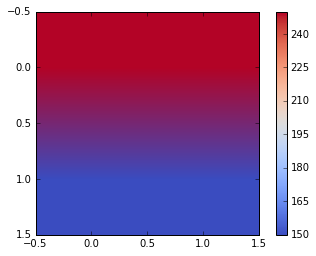

+-------+-------+
|   0   |   1   |
+-------+-------+
| 250.0 | 250.0 |
| 150.0 | 150.0 |
+-------+-------+


In [9]:
%matplotlib inline
# -*- coding: UTF-8 -*-
import math
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import numpy as np
                         
m=4 # row
n=4 # col 

# wall:

#  col 0 left
#  row n right
nodes_t0 = np.zeros((m,n))
#  row 0 top
nodes_t0[0,1],nodes_t0[0,2]=500,500
#  row m-1 bottom
nodes_t0[3,1],nodes_t0[3,2]=100,100
# left col 0
nodes_t0[1,0],nodes_t0[2,0]=100,100
# right n-1 
nodes_t0[1,3],nodes_t0[2,3]=100,100

nodes_t1 = np.zeros((m,n))
#  row 0 top
nodes_t1[0,1],nodes_t1[0,2]=500,500
#  row m-1 bottom
nodes_t1[3,1],nodes_t1[3,2]=100,100
# left col 0
nodes_t1[1,0],nodes_t1[2,0]=100,100
# right n-1 
nodes_t1[1,3],nodes_t1[2,3]=100,100

# 1  nodes_t0[1,1]
# 2 nodes_t0[1,2]
# 3 nodes_t0[2,1]
# 4 nodes_t0[2,2]

nodes_t0[1,1]=300
nodes_t0[1,2]=300
nodes_t0[2,1]=200
nodes_t0[2,2]=200

flat_id=[(1,1),(1,2),(2,1),(2,2)]

def GaussSeidel(nodes_t0,nodes_t1):
    maxt=0
    i=0
    while(1):
       
        for node in flat_id:
            r=node[0]
            c=node[1]
            nodes_t1[r,c]=0.25*(nodes_t0[r-1,c]+nodes_t0[r+1,c]+
                             nodes_t0[r,c+1]+nodes_t0[r,c-1])
            curdifft=abs(nodes_t1[r,c]-nodes_t0[r,c])

            if curdifft> maxt:
                maxt=curdifft
            nodes_t0[r,c]= nodes_t1[r,c]
          
        if maxt<2e-4: 
            print('Iteration End')
            break
        else: 
           i=i+1
           if (i>20):
              break
            
    return nodes_t1
    

def print_temperaturetable(t):
    
    table = PrettyTable(["0","1"])  
    table.align= "c" #居中
    table.padding_width = 1 #One space between column edges and contents (default)
    for i in range(2):
        table.add_row([t[i,0],t[i,1]])
    print(table)

nodes_t1=GaussSeidel(nodes_t0,nodes_t1)
temperature=np.zeros((2,2))

for i in range(2):
    temperature[i,0]= nodes_t1[i+1,1]  
    temperature[i,1]= nodes_t1[i+1,2]  

plt.imshow(temperature,interpolation='bilinear', cmap=plt.get_cmap("coolwarm"))
plt.colorbar()
plt.show()

print_temperaturetable(temperature)
